In [287]:
import numpy as np
import pandas as pd
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression

In [288]:
from matplotlib import pyplot as plt
%matplotlib inline

In [289]:
from sklearn.preprocessing import StandardScaler

In [290]:
from IPython.display import Image

In [291]:
import seaborn as sns; sns.set()

In [292]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

In [293]:
def gradient_descent(X, Y, B, alpha, iterations, precision=0.001):
    cost_history = [0] * iterations
    m = len(Y)
    previous_step_size=1
    iteration=0
    theta=[]
    while previous_step_size > precision and iteration < iterations:
        theta.append(B)
        # Hypothesis Values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
        previous_step_size = abs(cost - cost_history[iteration-1]) #Change in x
        #print("previous_step_size",previous_step_size,"\nX iteration",iteration)
        iteration = iteration + 1 #iteration count
    return B, cost_history, theta

In [294]:
# Model Evaluation - RMSE
def rmse(Y, Y_pred):
    rmse = float(np.sqrt(sum((Y - Y_pred) ** 2) / len(Y)))
    return rmse
# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

In [295]:
def plot_corr_heatmap(df_corr):
    mask = np.zeros_like(df_corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=(20, 10))
    colormap = sns.diverging_palette(10, 140, as_cmap=True)
    sns.heatmap(df_corr, mask=mask, cmap=colormap, vmax=1.0,vmin=-1.0,
                square=True, 
                linewidths=.5, cbar_kws={"shrink": .5}, ax=ax);

In [3]:
#pd.set_option('display.float_format', '{:.3f}'.format)

In [296]:
df_train_1 = pd.read_csv(r"Features_Variant_1.csv", header=None)
df_train_2 = pd.read_csv(r"Features_Variant_2.csv", header=None)
df_train_3 = pd.read_csv(r"Features_Variant_3.csv", header=None)
df_train_4 = pd.read_csv(r"Features_Variant_4.csv", header=None)
df_train_5 = pd.read_csv(r"Features_Variant_5.csv", header=None)
df_test = pd.read_csv(r"Features_TestSet.csv", header=None)


In [297]:
df = df_train_1.append([df_train_2, df_train_3,df_train_4,df_train_5,df_test])

In [298]:
df.columns = ["Page_Popularity", "Page_Checkins", "Page_talking_about", "Page_Category", "Derived_1", "Derived_2", "Derived_3", "Derived_4", "Derived_5", "Derived_6", "Derived_7", "Derived_8", "Derived_9", "Derived_10", "Derived_11", "Derived_12", "Derived_13", "Derived_14", "Derived_15", "Derived_16", "Derived_17", "Derived_18", "Derived_19", "Derived_20", "Derived_21", "Derived_22", "Derived_23", "Derived_24", "Derived_25", "CC1", "CC2", "CC3", "CC4", "CC5", "Base_time", "Post_length", "Post_Share_Count", "Post_Promotion_Status", "H_Local", "Post_published_weekday_1", "Post_published_weekday_2", "Post_published_weekday_3", "Post_published_weekday_4", "Post_published_weekday_5", "Post_published_weekday_6", "Post_published_weekday_7", "Base_DateTime_weekday_1", "Base_DateTime_weekday_2", "Base_DateTime_weekday_3", "Base_DateTime_weekday_4", "Base_DateTime_weekday_5", "Base_DateTime_weekday_6", "Base_DateTime_weekday_7", "Target_Variable"]

In [299]:
df.shape

(612857, 54)

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 612857 entries, 0 to 10043
Data columns (total 54 columns):
Page_Popularity             612857 non-null int64
Page_Checkins               612857 non-null int64
Page_talking_about          612857 non-null int64
Page_Category               612857 non-null int64
Derived_1                   612857 non-null float64
Derived_2                   612857 non-null float64
Derived_3                   612857 non-null float64
Derived_4                   612857 non-null float64
Derived_5                   612857 non-null float64
Derived_6                   612857 non-null float64
Derived_7                   612857 non-null float64
Derived_8                   612857 non-null float64
Derived_9                   612857 non-null float64
Derived_10                  612857 non-null float64
Derived_11                  612857 non-null float64
Derived_12                  612857 non-null float64
Derived_13                  612857 non-null float64
Derived_14    

In [301]:
df.head()

,Page_Popularity,Page_Checkins,Page_talking_about,Page_Category,Derived_1,Derived_2,Derived_3,Derived_4,Derived_5,Derived_6,...,Post_published_weekday_6,Post_published_weekday_7,Base_DateTime_weekday_1,Base_DateTime_weekday_2,Base_DateTime_weekday_3,Base_DateTime_weekday_4,Base_DateTime_weekday_5,Base_DateTime_weekday_6,Base_DateTime_weekday_7,Target_Variable
0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,0,0,1,0
1,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,0,1,0,0
2,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,1,0,0,0,0,0,0,0,1,0
3,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,1,0,0,1,0,0,0,0,0,0
4,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,1,0,0,0,0


In [302]:
df.isna().sum()

Page_Popularity             0
Page_Checkins               0
Page_talking_about          0
Page_Category               0
Derived_1                   0
Derived_2                   0
Derived_3                   0
Derived_4                   0
Derived_5                   0
Derived_6                   0
Derived_7                   0
Derived_8                   0
Derived_9                   0
Derived_10                  0
Derived_11                  0
Derived_12                  0
Derived_13                  0
Derived_14                  0
Derived_15                  0
Derived_16                  0
Derived_17                  0
Derived_18                  0
Derived_19                  0
Derived_20                  0
Derived_21                  0
Derived_22                  0
Derived_23                  0
Derived_24                  0
Derived_25                  0
CC1                         0
CC2                         0
CC3                         0
CC4                         0
CC5       

In [304]:
print("Page Category: ")
print(df['Page_Category'].value_counts()[:10])

Page Category: 
9     113192
24     66811
18     63561
36     35369
16     28006
14     24916
8      21422
32     20486
4      17125
2      15637
Name: Page_Category, dtype: int64


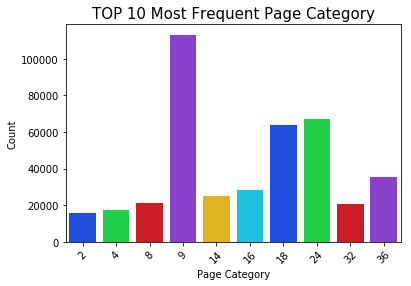

In [262]:
sns.countplot(df[df['Page_Category']\
                       .isin(df['Page_Category']\
                             .value_counts()[:10].index.values)]['Page_Category'], palette="bright") 
plt.title("TOP 10 Most Frequent Page Category", fontsize=15)
plt.xlabel("Page Category", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.xticks(rotation=45)

plt.show()

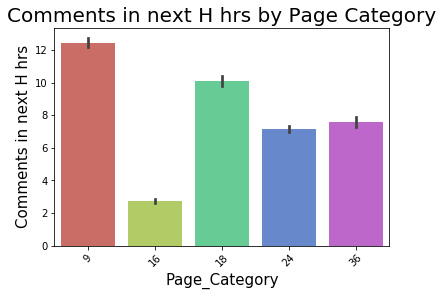

In [207]:
g1 = sns.barplot(x='Page_Category', y='Target_Variable', 
                   data=df[(df['Page_Category'].isin((df['Page_Category'].value_counts()[:5].index.values)))],palette='hls')
g1.set_title('Comments in next H hrs by Page Category', fontsize=20) 
g1.set_xlabel('Page_Category', fontsize=15) 
g1.set_ylabel('Comments in next H hrs', fontsize=15)
plt.xticks(rotation=45)
plt.show()

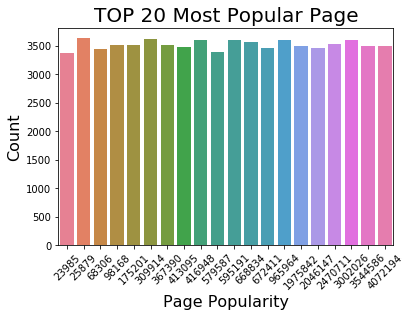

In [68]:
sns.countplot(df[df['Page_Popularity']\
                       .isin(df['Page_Popularity']\
                             .value_counts()[:20].index.values)]['Page_Popularity'], palette="husl") 
plt.title("TOP 20 Most Popular Page", fontsize=20)
plt.xlabel("Page Popularity", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.xticks(rotation=45)

plt.show()

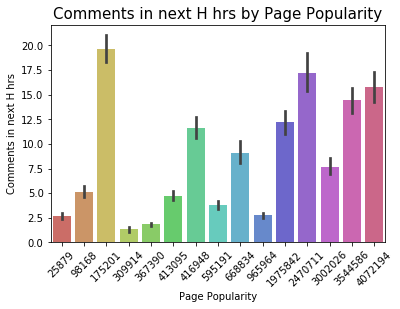

In [263]:
g1 = sns.barplot(x='Page_Popularity', y='Target_Variable', 
                   data=df[(df['Page_Popularity'].isin((df['Page_Popularity'].value_counts()[:15].index.values)))],palette='hls')
g1.set_title('Comments in next H hrs by Page Popularity', fontsize=15) 
g1.set_xlabel('Page Popularity', fontsize=10) 
g1.set_ylabel('Comments in next H hrs', fontsize=10)
plt.xticks(rotation=45)
plt.show()

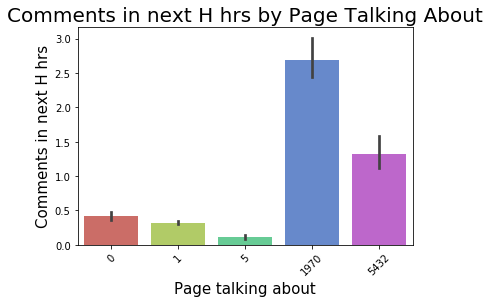

In [205]:
g1 = sns.barplot(x='Page_talking_about', y='Target_Variable', 
                   data=df[(df['Page_talking_about'].isin((df['Page_talking_about'].value_counts()[:5].index.values)))],palette='hls')
g1.set_title('Comments in next H hrs by Page Talking About', fontsize=20) 
g1.set_xlabel('Page talking about', fontsize=15) 
g1.set_ylabel('Comments in next H hrs', fontsize=15)
plt.xticks(rotation=45)
plt.show()

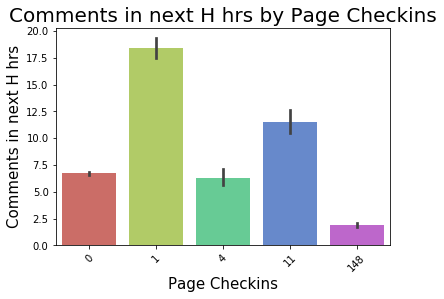

In [210]:
g1 = sns.barplot(x='Page_Checkins', y='Target_Variable', 
                   data=df[(df['Page_Checkins'].isin((df['Page_Checkins'].value_counts()[:5].index.values)))],palette='hls')
g1.set_title('Comments in next H hrs by Page Checkins', fontsize=20) 
g1.set_xlabel('Page Checkins', fontsize=15) 
g1.set_ylabel('Comments in next H hrs', fontsize=15)
plt.xticks(rotation=45)
plt.show()

In [261]:
post_pub=df[['Post_published_weekday_1','Post_published_weekday_2','Post_published_weekday_3','Post_published_weekday_4','Post_published_weekday_5','Post_published_weekday_6','Post_published_weekday_7']]

In [262]:
{ col: post_pub.loc[post_pub[col].ne(0), col].count() for col in post_pub.columns }

{'Post_published_weekday_1': 75786,
 'Post_published_weekday_2': 87125,
 'Post_published_weekday_3': 90214,
 'Post_published_weekday_4': 94825,
 'Post_published_weekday_5': 89432,
 'Post_published_weekday_6': 90637,
 'Post_published_weekday_7': 84838}

In [56]:
base_time=df[['Base_DateTime_weekday_1','Base_DateTime_weekday_2','Base_DateTime_weekday_3','Base_DateTime_weekday_4','Base_DateTime_weekday_5','Base_DateTime_weekday_6','Base_DateTime_weekday_7','Target_Variable']]

In [57]:
{ col: base_time.loc[base_time[col].ne(0), col].count() for col in base_time.columns }

{'Base_DateTime_weekday_1': 87804,
 'Base_DateTime_weekday_2': 82695,
 'Base_DateTime_weekday_3': 83028,
 'Base_DateTime_weekday_4': 88427,
 'Base_DateTime_weekday_5': 94176,
 'Base_DateTime_weekday_6': 88983,
 'Base_DateTime_weekday_7': 87744,
 'Target_Variable': 275766}

In [58]:
b1=base_time.groupby(['Base_DateTime_weekday_1'])['Target_Variable'].sum()
b2=base_time.groupby(['Base_DateTime_weekday_2'])['Target_Variable'].sum()
b3=base_time.groupby(['Base_DateTime_weekday_3'])['Target_Variable'].sum()
b4=base_time.groupby(['Base_DateTime_weekday_4'])['Target_Variable'].sum()
b5=base_time.groupby(['Base_DateTime_weekday_5'])['Target_Variable'].sum()
b6=base_time.groupby(['Base_DateTime_weekday_6'])['Target_Variable'].sum()
b7=base_time.groupby(['Base_DateTime_weekday_7'])['Target_Variable'].sum()

In [59]:
print(pd.concat([b1,b2,b3,b4,b5,b6],axis=1))

   Target_Variable  Target_Variable  Target_Variable  Target_Variable  \
0          3978891          3994674          3975388          3838912   
1           632766           616983           636269           772745   

   Target_Variable  Target_Variable  
0          3890712          3986202  
1           720945           625455  


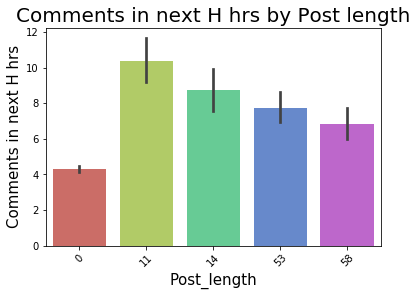

In [263]:
g1 = sns.barplot(x='Post_length', y='Target_Variable', 
                   data=df[(df['Post_length'].isin((df['Post_length'].value_counts()[:5].index.values)))],palette='hls')
g1.set_title('Comments in next H hrs by Post length', fontsize=20) 
g1.set_xlabel('Post_length', fontsize=15) 
g1.set_ylabel('Comments in next H hrs', fontsize=15)
plt.xticks(rotation=45)
plt.show()

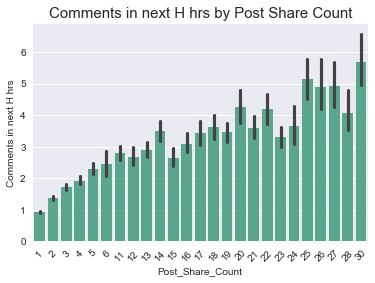

In [279]:
g1 = sns.barplot(x='Post_Share_Count', y='Target_Variable', 
                   data=df[(df['Post_Share_Count'].isin((df['Post_Share_Count'].value_counts()[:25].index.values)))],color="#4CB391")
g1.set_title('Comments in next H hrs by Post Share Count', fontsize=15) 
g1.set_xlabel('Post_Share_Count', fontsize=10) 
g1.set_ylabel('Comments in next H hrs', fontsize=10)
plt.xticks(rotation=45)
plt.show()

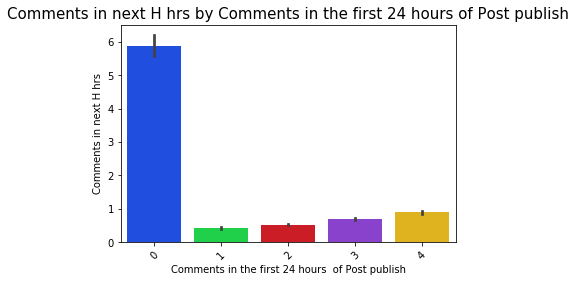

In [267]:
g1 = sns.barplot(x='CC4', y='Target_Variable', 
                   data=df[(df['CC4'].isin((df['CC4'].value_counts()[:5].index.values)))],palette='bright')
g1.set_title('Comments in next H hrs by Comments in the first 24 hours of Post publish', fontsize=15) 
g1.set_xlabel('Comments in the first 24 hours  of Post publish', fontsize=10) 
g1.set_ylabel('Comments in next H hrs', fontsize=10)
plt.xticks(rotation=45)
plt.show()

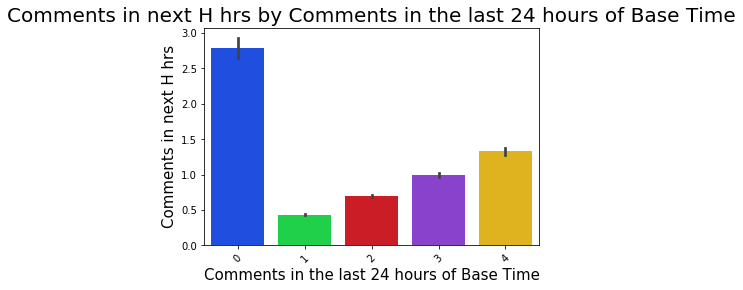

In [71]:
g1 = sns.barplot(x='CC2', y='Target_Variable', 
                   data=df[(df['CC2'].isin((df['CC2'].value_counts()[:5].index.values)))],palette='bright')
g1.set_title('Comments in next H hrs by Comments in the last 24 hours of Base Time', fontsize=20) 
g1.set_xlabel('Comments in the last 24 hours of Base Time', fontsize=15) 
g1.set_ylabel('Comments in next H hrs', fontsize=15)
plt.xticks(rotation=45)
plt.show()

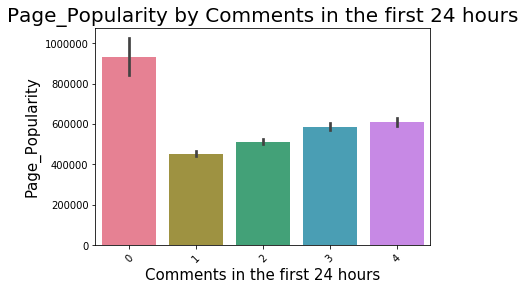

In [12]:
g1 = sns.barplot(x='CC4', y='Page_Popularity', 
                   data=df[(df['CC4'].isin((df['CC4'].value_counts()[:5].index.values)))],palette='husl')
g1.set_title('Page_Popularity by Comments in the first 24 hours', fontsize=20) 
g1.set_xlabel('Comments in the first 24 hours', fontsize=15) 
g1.set_ylabel('Page_Popularity', fontsize=15)
plt.xticks(rotation=45)
plt.show()

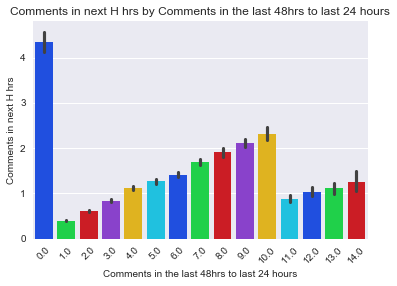

In [277]:
g1 = sns.barplot(x='CC5', y='Target_Variable', 
                   data=abs(df[(df['CC5'].isin((df['CC5'].value_counts()[:25].index.values)))]),palette='bright')
g1.set_title('Comments in next H hrs by Comments in the last 48hrs to last 24 hours', fontsize=12) 
g1.set_xlabel('Comments in the last 48hrs to last 24 hours', fontsize=10) 
g1.set_ylabel('Comments in next H hrs', fontsize=10)
plt.xticks(rotation=45)
plt.show()

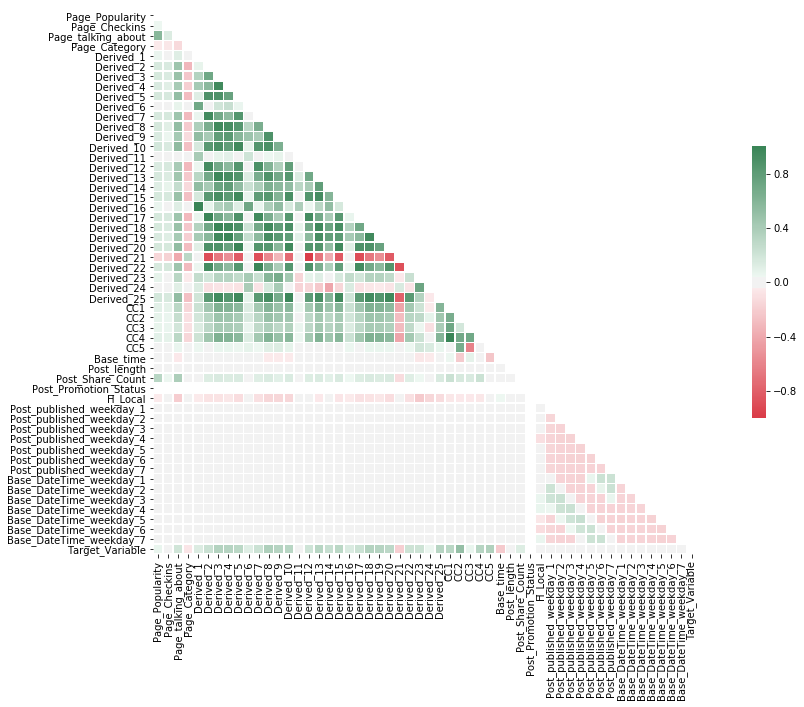

In [37]:
plot_corr_heatmap(df.corr())

#### Splitting data into feature set and target variable

In [305]:
y=df["Target_Variable"]
X=df.drop(["Target_Variable"], 1)

In [306]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 612857 entries, 0 to 10043
Data columns (total 53 columns):
Page_Popularity             612857 non-null int64
Page_Checkins               612857 non-null int64
Page_talking_about          612857 non-null int64
Page_Category               612857 non-null int64
Derived_1                   612857 non-null float64
Derived_2                   612857 non-null float64
Derived_3                   612857 non-null float64
Derived_4                   612857 non-null float64
Derived_5                   612857 non-null float64
Derived_6                   612857 non-null float64
Derived_7                   612857 non-null float64
Derived_8                   612857 non-null float64
Derived_9                   612857 non-null float64
Derived_10                  612857 non-null float64
Derived_11                  612857 non-null float64
Derived_12                  612857 non-null float64
Derived_13                  612857 non-null float64
Derived_14    

In [307]:
X.shape

(612857, 53)

In [308]:
y.shape

(612857,)

###### Removing the Derived columns and Post Promotion status from feature set

In [309]:
X.drop(['Derived_1','Derived_2','Derived_3','Derived_4','Derived_5','Derived_6','Derived_7','Derived_8','Derived_9','Derived_10','Derived_11','Derived_12','Derived_13','Derived_14','Derived_15','Derived_16','Derived_17','Derived_18','Derived_19','Derived_20','Derived_21','Derived_22','Derived_23','Derived_24','Derived_25','Post_Promotion_Status'],axis=1,inplace=True)

In [310]:
X.shape

(612857, 27)

In [311]:
X.head()

,Page_Popularity,Page_Checkins,Page_talking_about,Page_Category,CC1,CC2,CC3,CC4,CC5,Base_time,...,Post_published_weekday_5,Post_published_weekday_6,Post_published_weekday_7,Base_DateTime_weekday_1,Base_DateTime_weekday_2,Base_DateTime_weekday_3,Base_DateTime_weekday_4,Base_DateTime_weekday_5,Base_DateTime_weekday_6,Base_DateTime_weekday_7
0,634995,0,463,1,0,0,0,0,0,65,...,0,0,0,0,0,0,0,0,0,1
1,634995,0,463,1,0,0,0,0,0,10,...,1,0,0,0,0,0,0,0,1,0
2,634995,0,463,1,0,0,0,0,0,14,...,0,1,0,0,0,0,0,0,0,1
3,634995,0,463,1,7,0,3,7,-3,62,...,0,1,0,0,1,0,0,0,0,0
4,634995,0,463,1,1,0,0,1,0,58,...,0,0,0,0,0,0,1,0,0,0


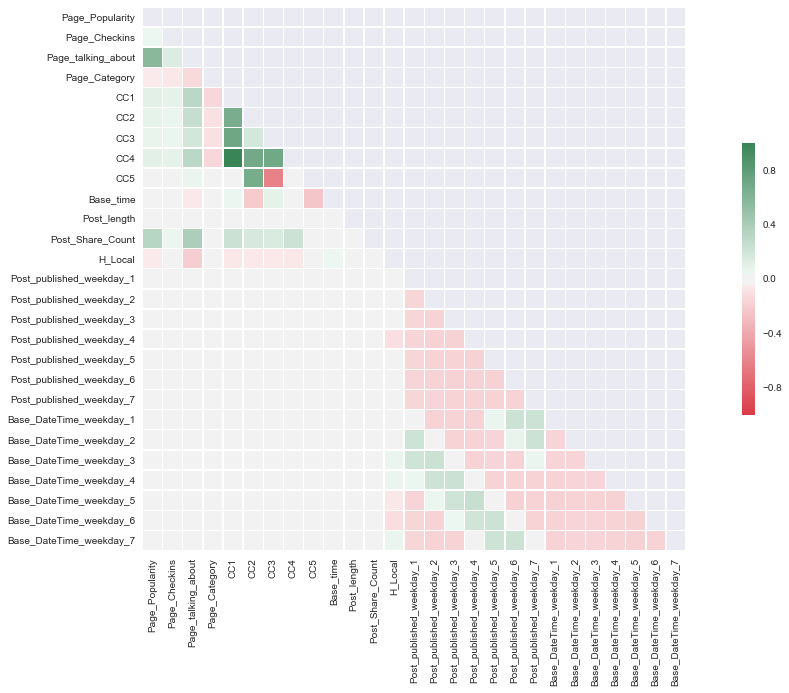

In [312]:
plot_corr_heatmap(X.corr())

In [313]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X,y,test_size=.3,shuffle = True, random_state=42)

In [314]:
#scaling using Standard range scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [315]:
X_train.shape

(428999, 27)

### Experiment 1: Experiment with various values of learning rate ∝ and report on your findings as how the error varies for train and test sets with varying ∝. Plot the results. Report your best ∝ and why you picked it.

In [328]:
m = len(y_train)
x0 = np.ones(m).reshape(-1,1)
x = np.concatenate((x0, X_train),axis=1)

In [329]:
m_test = len(y_test)
x0_test = np.ones(m_test).reshape(-1,1)
x_test = np.concatenate((x0_test, X_test),axis=1)

In [337]:
# Initial Coefficients
B = np.random.rand(28)
Y = np.array(y_train)
alpha = [0.0001,0.001,0.005,0.01,0.1]
precisions=0.001

In [338]:
print ('Initial Beta values :{}'.format(B))
print ('Initial Alpha value set :{}'.format(0.01))
print ('Initial Threshhold values :{}'.format(precisions))

Initial Beta values :[0.77907143 0.89294069 0.24314677 0.18674396 0.01379653 0.50751722
 0.17082856 0.40406478 0.89065302 0.55377052 0.03662954 0.99333586
 0.08874778 0.76463312 0.26032842 0.25088357 0.75035029 0.44805441
 0.2128828  0.48662297 0.34075632 0.16850342 0.26378236 0.79173242
 0.2710491  0.16290271 0.99922987 0.62025006]
Initial Alpha value set :0.01
Initial Threshhold values :0.001


###### Initial Cost

In [340]:
initial_cost = cost_function(x, Y, B)
print('Initial Cost is :{}'.format(initial_cost))

Initial Cost is :704.1032757494031


In [341]:
#Initializing variables
train_errors = list()
test_errors = list()
report_table=[]

###### Running with different learning rate

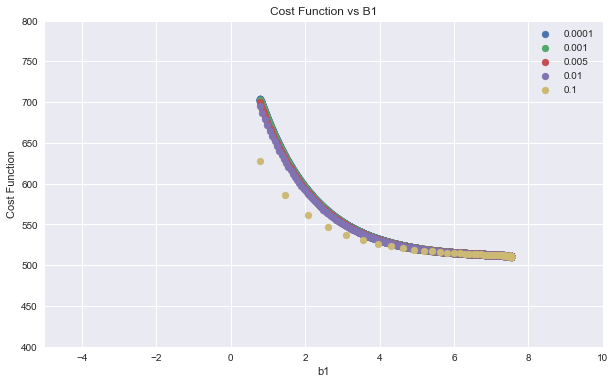

In [342]:
fig=plt.figure(figsize=(10, 6))
for a in alpha:
    newB, cost_history, theta = gradient_descent(x, Y, B, a, 10000)
    Y_pred = x.dot(newB)
    Y_pred_test = x_test.dot(newB)
    theta=pd.DataFrame(theta)
    report_table = report_table + [[a, newB, cost_history[np.max(np.nonzero(cost_history))], rmse(Y, Y_pred), r2_score(Y, Y_pred), rmse(y_test, Y_pred_test), r2_score(y_test, Y_pred_test)]]
    plt.scatter(theta[0],[cost_history[i] for i, e in enumerate(cost_history) if e != 0],label=a)
    plt.ylim([400,800])
    plt.xlim([-5,10])
    plt.title("Cost Function vs B1")
    plt.xlabel('b1')
    plt.ylabel('Cost Function')
    plt.legend()
    train_errors.append(rmse(Y, Y_pred))
    test_errors.append(rmse(y_test, Y_pred_test))

###### Optimal learning rate based on minimum RMSE on test set

In [343]:
i_alpha_optim = np.argmin(test_errors)
alpha_optim = alpha[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)

Optimal regularization parameter : 0.1


###### Error Values for different learning rate

Text(0,0.5,'Performance')

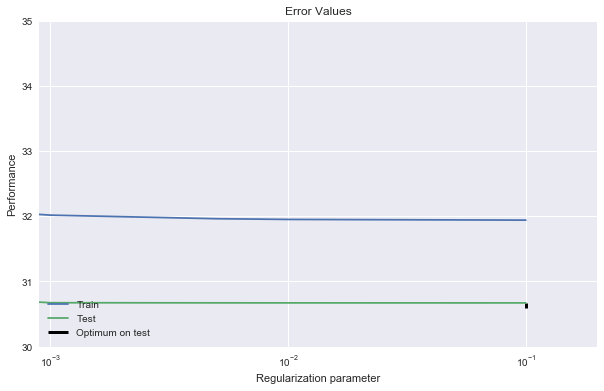

In [344]:
plt.figure(figsize=(10,6))
plt.semilogx(alpha, train_errors, label='Train')
plt.semilogx(alpha, test_errors, label='Test')
plt.vlines(alpha_optim, plt.ylim()[0], np.min(test_errors), color='k',
           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left')
plt.ylim([30, 35])
plt.xlim([0.0009,0.2])
plt.title("Error Values")
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')

In [345]:
report_table

[[0.0001,
  array([ 5.05467055,  0.32429441,  0.11966923,  2.20236681, -0.45885118,
          2.92514164,  6.91417602,  0.1089685 ,  3.53655225,  6.22203454,
         -3.85330494,  0.38665285,  1.36583963,  0.39840069,  0.30435347,
          0.35102956,  0.58306222,  0.54231026,  0.24930246,  0.39677885,
          0.32596494,  0.38137402,  0.43920794,  0.58825838,  0.55304908,
          0.26035887,  0.54283112,  0.51068904]),
  520.2820571489043,
  32.257776028390914,
  0.2667345654939024,
  30.86784795738271,
  0.2845344931098259],
 [0.001,
  array([ 7.11741016, -0.72376379, -0.1790794 ,  2.79446618, -0.33252315,
          2.3536413 ,  8.39777329,  0.62080579,  2.96695893,  7.03042297,
         -4.78733395,  0.1073086 ,  1.59085694,  0.49725906,  0.23610758,
          0.39171174,  0.54793198,  0.5317784 ,  0.35976494,  0.38975464,
          0.29125642,  0.51334506,  0.55054136,  0.49917483,  0.62129614,
          0.2379276 ,  0.36531899,  0.49026787]),
  512.5331821351983,
  32.016657

In [346]:
report = pd.DataFrame(report_table,columns = ['Alpha', 'new co-efficients', 'Final Cost', 'RMSE Train', 'R2 score train','RMSE Test', 'R2 score Test'])

In [347]:
report

,Alpha,new co-efficients,Final Cost,RMSE Train,R2 score train,RMSE Test,R2 score Test
0,0.0001,"[5.054670553183706, 0.3242944053634478, 0.1196...",520.282057,32.257776,0.266735,30.867848,0.284534
1,0.0010,"[7.117410159270342, -0.7237637881698765, -0.17...",512.533182,32.016658,0.277656,30.673918,0.293496
2,0.0050,"[7.535292370870743, -1.4193169099044276, -0.27...",510.774450,31.961679,0.280134,30.671858,0.293591
3,0.0100,"[7.542126877351148, -1.5417873615928421, -0.27...",510.427066,31.950808,0.280624,30.671408,0.293612
4,0.1000,"[7.542772795184047, -1.639782738793154, -0.272...",510.087270,31.940171,0.281103,30.671042,0.293629


### Experiment 2: Experiment with various thresholds for convergence. Plot error results for train and test sets as a function of threshold and describe how varying the threshold affects error. Pick your best threshold and plot train and test error (in one figure) as a function of number of gradient descent iterations.

In [378]:
thresholds=[0.0001,0.0005,0.001,0.005,0.01,0.5,0.9]

In [379]:
train_errors = list()
test_errors = list()
report_table=[]

In [380]:
for t in thresholds:
    newB, cost_history, theta = gradient_descent(x, Y, B, 0.1, 10000,t)
    Y_pred = x.dot(newB)
    Y_pred_test = x_test.dot(newB)
    theta=pd.DataFrame(theta)
    report_table = report_table + [[t, newB, cost_history[np.max(np.nonzero(cost_history))], rmse(Y, Y_pred), r2_score(Y, Y_pred), rmse(y_test, Y_pred_test), r2_score(y_test, Y_pred_test)]]
    train_errors.append(rmse(Y, Y_pred))
    test_errors.append(rmse(y_test, Y_pred_test))

###### Optimal learning rate based on minimum RMSE on test set

In [381]:
i_thresholds_optim = np.argmin(test_errors)
thresholds_optim = thresholds[i_thresholds_optim]
print("Optimal threshold : %s" % thresholds_optim)

Optimal threshold : 0.0001


###### Error Values for different learning rate

Text(0,0.5,'Performance')

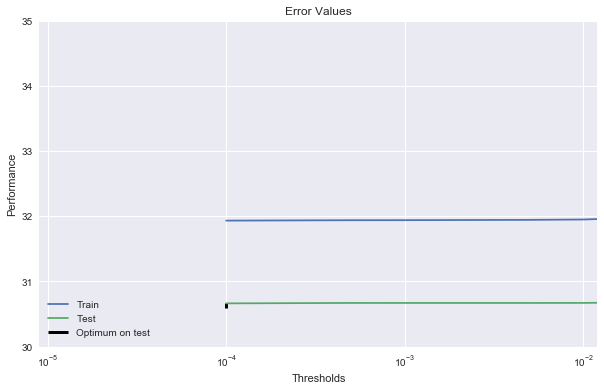

In [382]:
plt.figure(figsize=(10,6))
plt.semilogx(thresholds, train_errors, label='Train')
plt.semilogx(thresholds, test_errors, label='Test')
plt.vlines(thresholds_optim, plt.ylim()[0], np.min(test_errors), color='k',
           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left')
plt.ylim([30, 35])
plt.xlim([0.000009,0.012])
plt.title("Error Values")
plt.xlabel('Thresholds')
plt.ylabel('Performance')

In [383]:
report_table

[[0.0001,
  array([ 7.54277283, -1.65322551, -0.25507725,  3.69309143, -0.32196253,
          3.7909176 , 11.49753612,  3.77352907, -3.40392699,  7.13487982,
         -4.29124939,  0.05612317,  1.88000121,  0.70741942,  0.18315163,
          0.3878372 ,  0.57446799,  0.57318547,  0.42011469,  0.36710831,
          0.23670844,  0.56947103,  0.61108661,  0.5180793 ,  0.6226046 ,
          0.17890451,  0.30934094,  0.47236136]),
  509.867588445657,
  31.93329260961566,
  0.2814123154064888,
  30.66470255109353,
  0.29392065237458176],
 [0.0005,
  array([ 7.54277283, -1.64532342, -0.26994815,  3.6881442 , -0.30849347,
          0.59584339, 11.13029273,  3.47793981,  0.27868439,  7.06323233,
         -4.33393869,  0.05543655,  1.87575698,  0.70265011,  0.18105557,
          0.38936254,  0.57724016,  0.57250751,  0.41857686,  0.3669943 ,
          0.23671085,  0.57016726,  0.61240612,  0.51647656,  0.61972979,
          0.18049567,  0.31017114,  0.47235296]),
  510.06290535223445,
  31.93940

In [384]:
report = pd.DataFrame(report_table,columns = ['Thresholds', 'new co-efficients', 'Final Cost', 'RMSE Train', 'R2 score train','RMSE Test', 'R2 score Test'])

In [385]:
report

,Thresholds,new co-efficients,Final Cost,RMSE Train,R2 score train,RMSE Test,R2 score Test
0,0.0001,"[7.542772826976285, -1.6532255052575269, -0.25...",509.867588,31.933293,0.281412,30.664703,0.293921
1,0.0005,"[7.542772826180478, -1.6453234188165387, -0.26...",510.062905,31.939408,0.281137,30.671211,0.293621
2,0.0010,"[7.542772795184047, -1.639782738793154, -0.272...",510.087270,31.940171,0.281103,30.671042,0.293629
3,0.0050,"[7.542745861969122, -1.600927231139228, -0.279...",510.238808,31.944915,0.280889,30.671075,0.293627
4,0.0100,"[7.542397216407263, -1.5490388707794043, -0.28...",510.412551,31.950354,0.280644,30.671563,0.293605
5,0.5000,"[6.15018668912375, -0.12008979553443848, -0.02...",515.015478,32.094095,0.274157,30.718857,0.291425
6,0.9000,"[5.823530681479327, 0.03158487485098663, 0.020...",516.121348,32.128534,0.272599,30.747985,0.290080


In [360]:
train_errors_t = list()
test_errors_t = list()

In [367]:
newB, cost_history, theta = gradient_descent(x, Y, B, 0.1, 10000,0.0001)
for t in theta:
    Y_pred = x.dot(t)
    Y_pred_test = x_test.dot(t)
    train_errors_t.append(rmse(Y, Y_pred))
    test_errors_t.append(rmse(y_test, Y_pred_test))

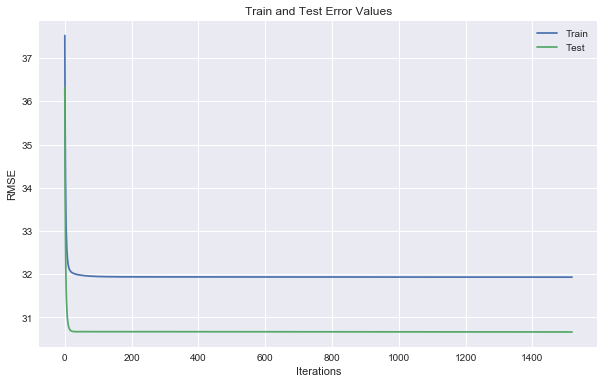

In [374]:
plt.figure(figsize=(10,6))
plt.plot(train_errors_t,label='Train')
plt.plot(test_errors_t,label='Test')
plt.title("Train and Test Error Values")
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.legend()

### Experiment 3:Pick five features randomly and retrain your model only on these five features. Compare train and test error results for the case of using your original set of features (greater than 10) and five random features. Report which five features did you select randomly.

In [386]:
X_Random=X[['CC4','Page_Checkins','Post_published_weekday_7','H_Local','Post_length']]

In [387]:
X_train_random_org, X_test_random_org, y_train_random, y_test_random = train_test_split(X_Random,y,test_size=.3,shuffle = True, random_state=42)

In [388]:
#scaling using min max scaler
scaler = StandardScaler()
X_train_random = scaler.fit_transform(X_train_random_org)
X_test_random = scaler.transform(X_test_random_org)

In [389]:
m = len(y_train_random)
x0 = np.ones(m).reshape(-1,1)
x_r = np.concatenate((x0, X_train_random),axis=1)

In [390]:
m_test = len(y_test_random)
x0_test = np.ones(m_test).reshape(-1,1)
x_test_r = np.concatenate((x0_test, X_test_random),axis=1)

In [391]:
# Initial Coefficients
B_r = np.random.rand(6)
Y_r = np.array(y_train_random)

###### Initial Cost

In [392]:
initial_cost = cost_function(x_r, Y_r, B_r)
print(initial_cost)

725.3351314619331


In [395]:
print ('Initial Beta values :{}'.format(B_r))

Initial Beta values :[0.82490038 0.64342893 0.89422137 0.75294941 0.86824346 0.07428559]


In [393]:
train_errors = list()
test_errors = list()
report_table=[]

In [394]:
newB, cost_history, theta = gradient_descent(x_r, Y_r, B_r, 0.1, 10000, 0.001)
Y_pred_r = x_r.dot(newB)
Y_pred_test_r = x_test_r.dot(newB)
theta=pd.DataFrame(theta)
report_table = report_table + [[newB, cost_history[np.max(np.nonzero(cost_history))], rmse(Y_r, Y_pred_r), r2_score(Y_r, Y_pred_r), rmse(y_test_random, Y_pred_test_r), r2_score(y_test_random, Y_pred_test_r)]]
train_errors.append(rmse(Y_r, Y_pred_r))
test_errors.append(rmse(y_test_random, Y_pred_test_r))

In [396]:
report_table

[[array([ 7.50430349e+00,  1.22368735e+01,  1.64963821e-01, -1.01474985e-01,
         -3.04411284e-01,  2.56681376e-03]),
  633.3087101951307,
  35.589568982923105,
  0.10743916655037467,
  34.218829238564595,
  0.12076232501691975]]

In [397]:
report = pd.DataFrame(report_table,columns = ['new co-efficients', 'Final Cost', 'RMSE Train', 'R2 score train','RMSE Test', 'R2 score Test'])

In [398]:
report

,new co-efficients,Final Cost,RMSE Train,R2 score train,RMSE Test,R2 score Test
0,"[7.504303488670787, 12.236873507912103, 0.1649...",633.30871,35.589569,0.107439,34.218829,0.120762


###### Result using original set of features

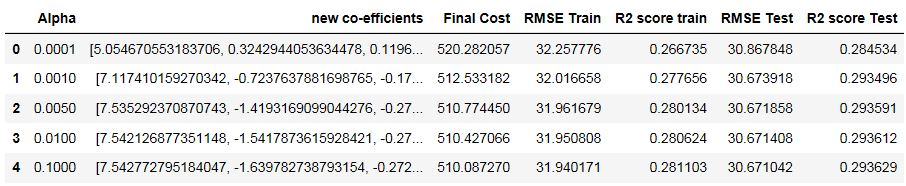

In [399]:
i=Image(filename='original.JPG')
i

### Experiment 4:Now pick five features that you think are best suited to predict the output, and retrain your model using these five features. Compare to the case of using your original set of features and to random features case. Did your choice of features provide better results than picking random features? Why? Did your choice of features provide better results than using all features? Why?

In [437]:
X_Sel=X[['CC1','Base_time','H_Local','Page_Category','Page_talking_about']]

In [438]:
X_train_sel_org, X_test_sel_org, y_train_sel, y_test_sel = train_test_split(X_Sel,y,test_size=.3,shuffle = True, random_state=0)

In [439]:
#scaling using min max scaler
scaler = StandardScaler()
X_train_sel = scaler.fit_transform(X_train_sel_org)
X_test_sel = scaler.transform(X_test_sel_org)

In [440]:
m = len(y_train_sel)
x0 = np.ones(m).reshape(-1,1)
x_s = np.concatenate((x0, X_train_sel),axis=1)

In [441]:
m_test = len(y_test_sel)
x0_test = np.ones(m_test).reshape(-1,1)
x_test_s = np.concatenate((x0_test, X_test_sel),axis=1)

In [442]:
# Initial Coefficients
B_s = np.random.rand(6)
Y_s = np.array(y_train_sel)
print ('Initial Beta values :{}'.format(B_s))

Initial Beta values :[0.25766391 0.56957766 0.44963906 0.37456661 0.0297677  0.26742188]


In [449]:
X_Sel.corr()

,CC1,Base_time,H_Local,Page_Category,Page_talking_about
CC1,1.000000,0.052722,-0.056487,-0.143853,0.305514
Base_time,0.052722,1.000000,0.042266,0.008100,-0.048719
H_Local,-0.056487,0.042266,1.000000,0.023208,-0.202602
Page_Category,-0.143853,0.008100,0.023208,1.000000,-0.132659
Page_talking_about,0.305514,-0.048719,-0.202602,-0.132659,1.000000


###### Initial Cost

In [443]:
initial_cost = cost_function(x_s, Y_s, B_s)
print(initial_cost)

723.5336314323954


In [444]:
train_errors = list()
test_errors = list()
report_table=[]

In [445]:
newB, cost_history, theta = gradient_descent(x_s, Y_s, B_s, 0.1, 10000,0.001)
Y_pred_s = x_s.dot(newB)
Y_pred_test_s = x_test_s.dot(newB)
theta=pd.DataFrame(theta)
report_table = report_table + [[newB, cost_history[np.max(np.nonzero(cost_history))], rmse(Y_s, Y_pred_s), r2_score(Y_s, Y_pred_s), rmse(y_test_sel, Y_pred_test_s), r2_score(y_test_sel, Y_pred_test_s)]]
train_errors.append(rmse(Y_s, Y_pred_s))
test_errors.append(rmse(y_test_sel, Y_pred_test_s))

In [446]:
report_table

[[array([ 7.5241561 , 10.98985444, -8.49946591,  0.85208893, -0.3140836 ,
          4.0314365 ]),
  585.8131022169024,
  34.229025759343685,
  0.164695229695898,
  33.79273169616577,
  0.1665428723275464]]

In [447]:
report = pd.DataFrame(report_table,columns = ['new co-efficients', 'Final Cost', 'RMSE Train', 'R2 score train','RMSE Test', 'R2 score Test'])

In [448]:
report

,new co-efficients,Final Cost,RMSE Train,R2 score train,RMSE Test,R2 score Test
0,"[7.524156100585126, 10.989854437059565, -8.499...",585.813102,34.229026,0.164695,33.792732,0.166543


###### Result using original set of features

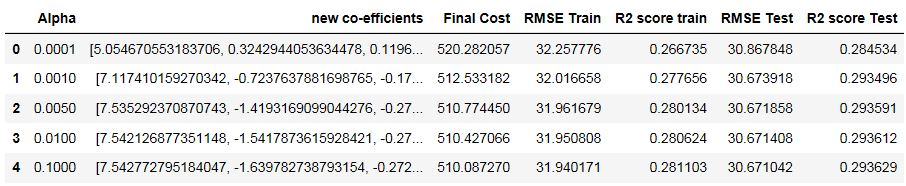

In [412]:
i=Image(filename='original.JPG')
i

###### Result using random features

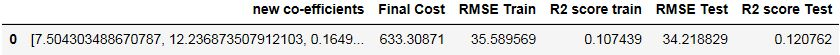

In [413]:
i=Image(filename='random.JPG')
i